In [1]:
# -*- coding: utf-8 -*-
# 导入所需库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lets_plot import *


In [2]:

# 设置 Lets-Plot 显示
LetsPlot.setup_html(no_js=True)

# ------------------------ PART 1: 加载和查看数据 ------------------------
# 读取 NH.Ts+dSST.csv (北半球气温异常数据)
temp_df = pd.read_csv("NH.Ts+dSST.csv", skiprows=1, na_values="***")

# 清理列名
temp_df.columns = temp_df.columns.str.strip()

# 查看数据前几行
print("气温异常数据 (NH.Ts+dSST.csv):")
print(temp_df.head())

# 读取 1_CO2-data.csv (CO2 数据)
co2_df = pd.read_csv("1_CO2-data.csv")

# 查看 CO2 数据
print("CO2 数据 (1_CO2-data.csv):")
print(co2_df.head())


气温异常数据 (NH.Ts+dSST.csv):
   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.39 -0.53 -0.23 -0.30 -0.05 -0.18 -0.22 -0.25 -0.24 -0.30 -0.43   
1  1881 -0.31 -0.25 -0.06 -0.02  0.05 -0.34  0.09 -0.06 -0.28 -0.44 -0.37   
2  1882  0.25  0.21  0.02 -0.30 -0.23 -0.29 -0.28 -0.15 -0.25 -0.52 -0.33   
3  1883 -0.57 -0.66 -0.15 -0.30 -0.26 -0.12 -0.06 -0.23 -0.34 -0.17 -0.44   
4  1884 -0.16 -0.11 -0.64 -0.59 -0.36 -0.41 -0.41 -0.52 -0.45 -0.44 -0.58   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.42 -0.30   NaN   NaN -0.20 -0.22 -0.32  
1 -0.24 -0.19 -0.20 -0.33 -0.01 -0.10 -0.37  
2 -0.68 -0.21 -0.17  0.08 -0.17 -0.24 -0.37  
3 -0.15 -0.29 -0.33 -0.64 -0.23 -0.14 -0.32  
4 -0.47 -0.43 -0.40 -0.14 -0.53 -0.45 -0.49  
CO2 数据 (1_CO2-data.csv):
   Year  Month  Monthly average  Interpolated   Trend
0  1958      3           315.71        315.71  314.62
1  1958      4           317.45        317.45  315.29
2  1958      5           317.50        317.50  31

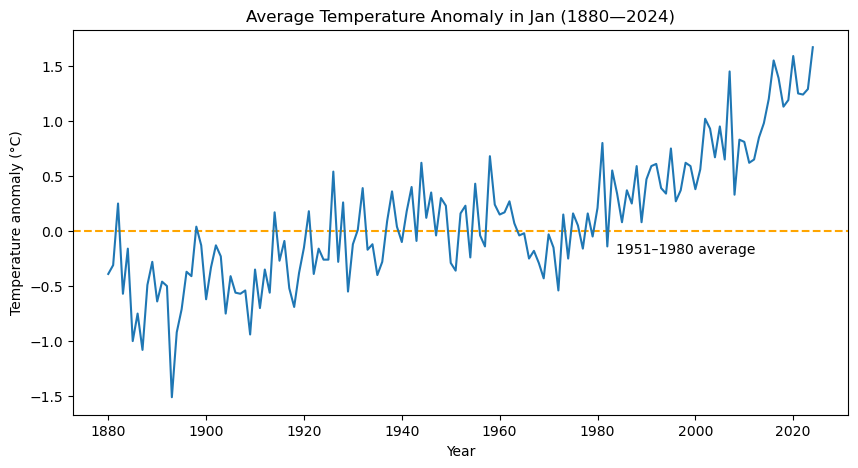

In [3]:

# ------------------------ PART 2: 温度异常时序图 ------------------------
# 将年份作为索引
temp_df = temp_df.set_index("Year")

# 绘制一个月的温度异常图（例如: 1月）
month = "Jan"
plt.figure(figsize=(10, 5))
plt.axhline(0, color="orange", linestyle="--")
plt.annotate("1951–1980 average", xy=(0.7, -0.2), xycoords=("axes fraction", "data"))
temp_df[month].plot()
plt.title(f"Average Temperature Anomaly in {month} (1880—{temp_df.index.max()})")
plt.ylabel("Temperature anomaly (°C)")
plt.xlabel("Year")
plt.show()


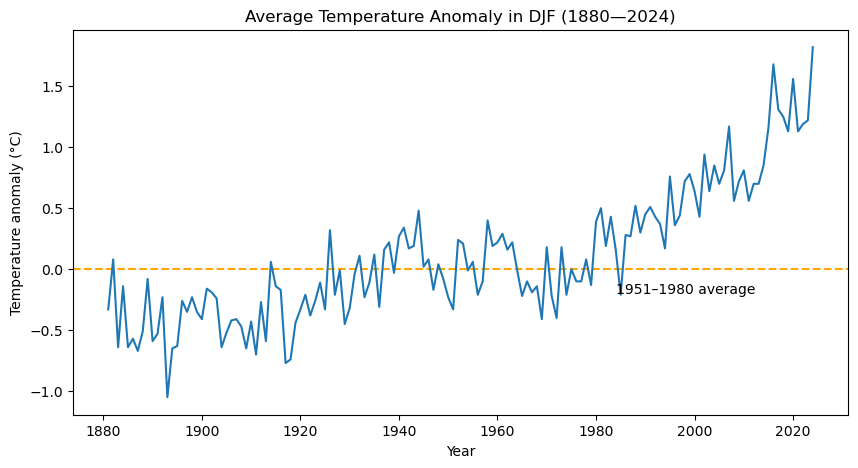

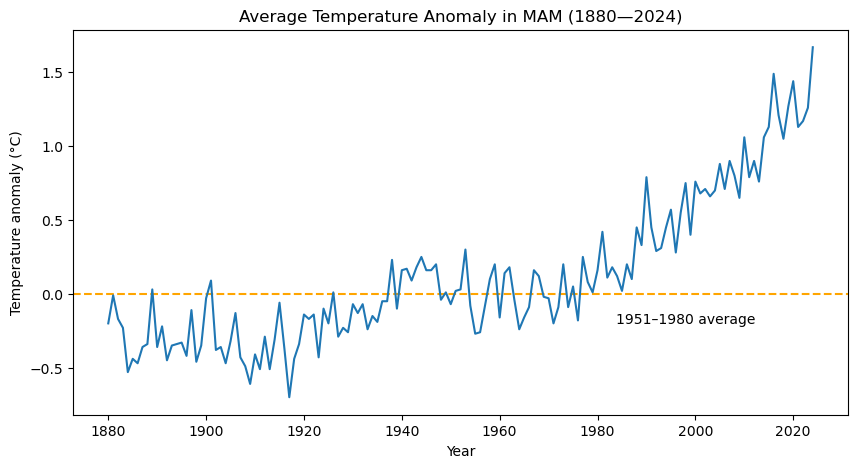

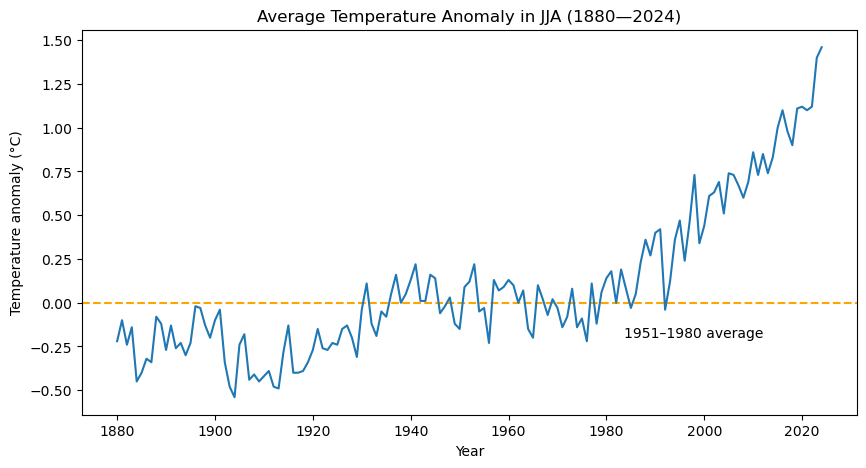

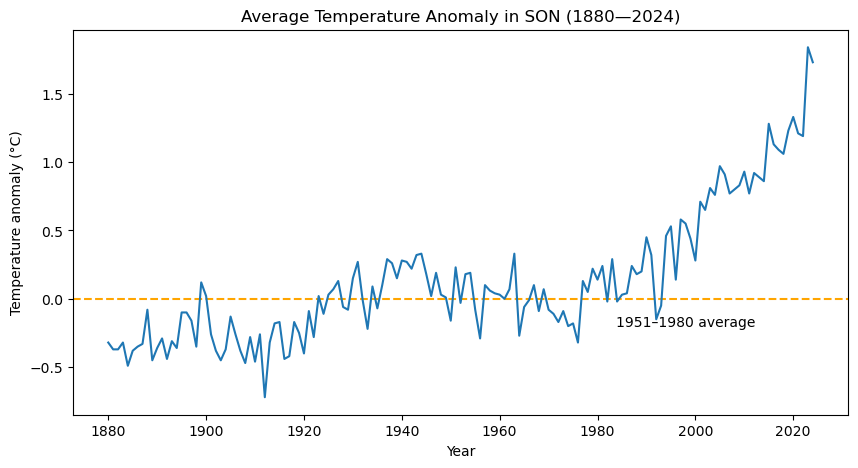

In [4]:

# 绘制四个季节的温度异常图
seasons = ["DJF", "MAM", "JJA", "SON"]
for season in seasons:
    plt.figure(figsize=(10, 5))
    plt.axhline(0, color="orange", linestyle="--")
    plt.annotate("1951–1980 average", xy=(0.7, -0.2), xycoords=("axes fraction", "data"))
    temp_df[season].plot()
    plt.title(f"Average Temperature Anomaly in {season} (1880—{temp_df.index.max()})")
    plt.ylabel("Temperature anomaly (°C)")
    plt.xlabel("Year")
    plt.show()


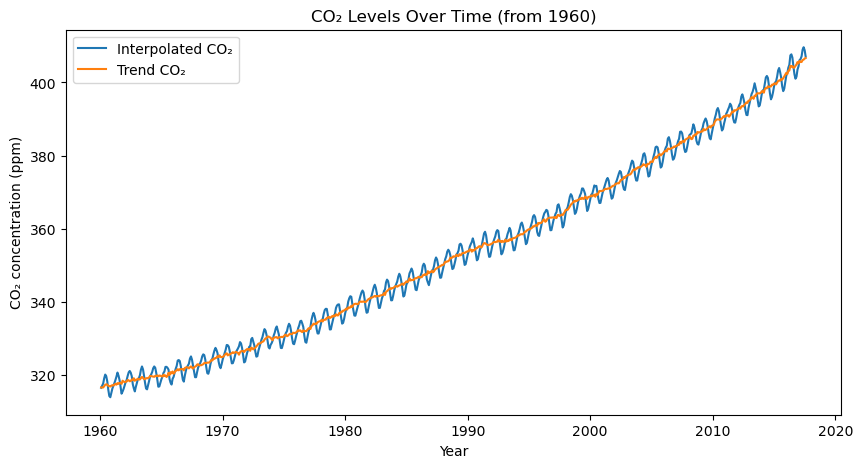

In [5]:

# ------------------------ PART 3: CO₂ 数据的时序图 ------------------------
# 筛选1960年后的数据
co2_df = co2_df[co2_df["Year"] >= 1960]

# 绘制 CO₂ 时间序列图
plt.figure(figsize=(10, 5))
plt.plot(co2_df["Year"] + co2_df["Month"] / 12, co2_df["Interpolated"], label="Interpolated CO₂")
plt.plot(co2_df["Year"] + co2_df["Month"] / 12, co2_df["Trend"], label="Trend CO₂")
plt.title("CO₂ Levels Over Time (from 1960)")
plt.xlabel("Year")
plt.ylabel("CO₂ concentration (ppm)")
plt.legend()
plt.show()


In [6]:

# ------------------------ PART 4: 温度和 CO₂ 数据相关性分析 ------------------------
# 筛选 CO₂ 数据中的6月数据
co2_june = co2_df[co2_df["Month"] == 6]

# 合并 CO₂ 数据和温度数据（6月）
merged_df = pd.merge(co2_june, temp_df, left_on="Year", right_index=True)
print("合并后的 CO₂ 和温度数据:")
print(merged_df[["Year", "Interpolated", "Jun"]].head())

# 计算相关系数
correlation = merged_df[["Interpolated", "Jun"]].corr()
print("CO₂ 浓度与 6 月温度异常的相关性:")
print(correlation)

# 绘制散点图 (CO₂ 和温度的关系)
(
    ggplot(merged_df, aes(x="Jun", y="Interpolated"))
    + geom_point(color="blue", size=3)
    + labs(
        title="Scatterplot of Temperature Anomalies vs CO₂ Levels",
        x="Temperature Anomaly in June (°C)",
        y="CO₂ Concentration (ppm)"
    )
)

合并后的 CO₂ 和温度数据:
    Year  Interpolated   Jun
27  1960        319.59  0.18
39  1961        319.77  0.18
51  1962        320.55 -0.13
63  1963        321.47 -0.04
75  1964        321.89 -0.09
CO₂ 浓度与 6 月温度异常的相关性:
              Interpolated       Jun
Interpolated      1.000000  0.923201
Jun               0.923201  1.000000
